# Import necessary libraries and mount Google Drive

In [1]:
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model


# Define paths and constants


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/autism/train'
test_path = '/content/drive/MyDrive/autism/test'
valid_path = '/content/drive/MyDrive/autism/valid'

batch_size = 32
image_size = (120, 120)


# Create ImageDataGenerator for training data


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create ImageDataGenerator for test and validation data

test_datagen = ImageDataGenerator(rescale=1.0 / 255)


# Load and augment the training data


In [5]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Adjust this based on your data
    shuffle=True  # Set to True to shuffle the data
)


Found 2526 images belonging to 2 classes.


# Load test and validation data


In [6]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# Get a batch of images and labels for visualization


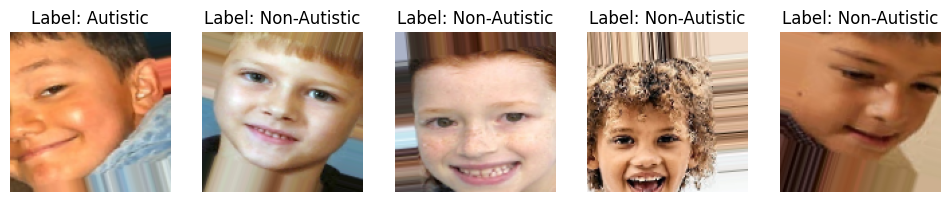

In [7]:
images, labels = next(train_generator)

num_samples = 5  # Change this to the number of samples you want to plot
random_indices = random.sample(range(batch_size), num_samples)

plt.figure(figsize=(12, 6))
for i, index in enumerate(random_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(images[index])
    label = "Non-Autistic" if labels[index] == 1 else "Autistic"
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.show()


# Import necessary libraries and load the EfficientNetB7 model

In [8]:
from tensorflow.keras.applications import EfficientNetB7
import tensorflow as tf
from keras.layers import Flatten, Dense

# Load the pre-trained EfficientNetB7 model
pre_trained_model = EfficientNetB7(include_top=False, weights='imagenet', input_shape=(120, 120, 3))

# Freeze all layers in the pre-trained model
for layer in pre_trained_model.layers:
    layer.trainable = False

x = Flatten()(pre_trained_model.output)
x = tf.keras.layers.Dense(64, activation='relu')(x)  # Reduced units
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Create the final model with the pre-trained base and custom classification layers
model = tf.keras.Model(pre_trained_model.input, x)


258076736/258076736 [==============================] - 1s 0us/step


# Create the final model with the pre-trained base and custom classification layers


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Display the model summary


In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 120, 120, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 120, 120, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 120, 120, 3)  0           ['normalization[0][0]']      

# Start training process

In [11]:
epochs = 100  # You can adjust the number of epochs as needed

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(valid_generator)
)


Epoch 1/100
79/79 [==============================] - 300s 3s/step - loss: 2.3703 - accuracy: 0.5012 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
79/79 [==============================] - 21s 261ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/100
79/79 [==============================] - 20s 253ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/100
79/79 [==============================] - 21s 259ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/100
79/79 [==============================] - 20s 252ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/100
79/79 [==============================] - 21s 260ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
79/79 [==============================] - 21s 265ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6931 - val_accuracy: 0

# Plotting Graphs

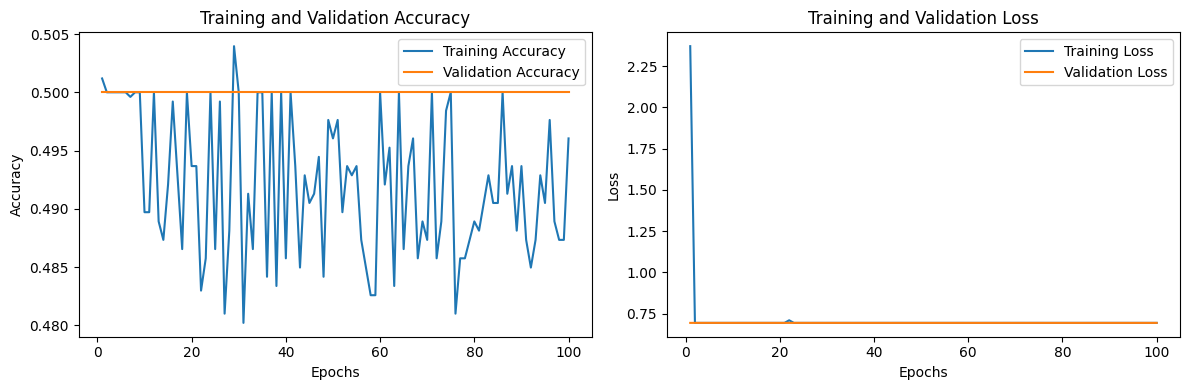

In [14]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy and loss from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Evaluate the model on the test data and print test accuracy

In [12]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


7/7 [==============================] - 1s 112ms/step - loss: 0.6931 - accuracy: 0.5000
Test Accuracy: 50.00%


# Predicting on Test Images using Developed Model

1/1 [==============================] - 0s 94ms/step


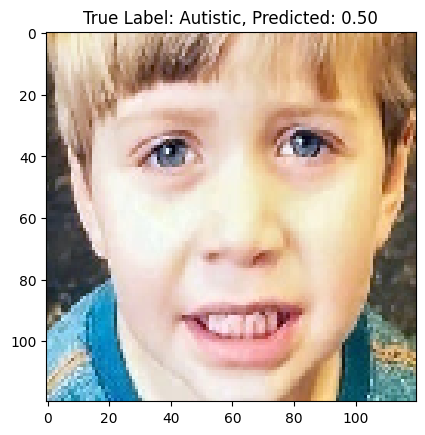

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Load a batch of test images and labels
test_images, test_labels = next(test_generator)

# Predict using the model
predictions = model.predict(test_images)

# Choose a random image from the batch
index = np.random.randint(0, len(test_images))
sample_image = test_images[index]
sample_label = test_labels[index]
sample_prediction = predictions[index]

# Display the image
plt.imshow(sample_image)
label = "Non-Autistic" if sample_label == 0 else "Autistic"
plt.title(f"True Label: {label}, Predicted: {sample_prediction[0]:.2f}")
plt.show()


# Specify the path where you want to save the model

In [13]:
model_save_path = '/content/drive/MyDrive/autism/autisim_model.h5'

model.save(model_save_path)

print(f"Model saved to {model_save_path}")
